# Small Dataset Experiments

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.algorithm import run_genetic_algorithm
from src.genetic_operators import ( tournament_selection, roulette_wheel_selection
                                , one_point_crossover, uniform_crossover
                                , single_gene_mutation, independent_gene_mutation)

Small Graph Loaded
Nodes: 11
Edges: 20


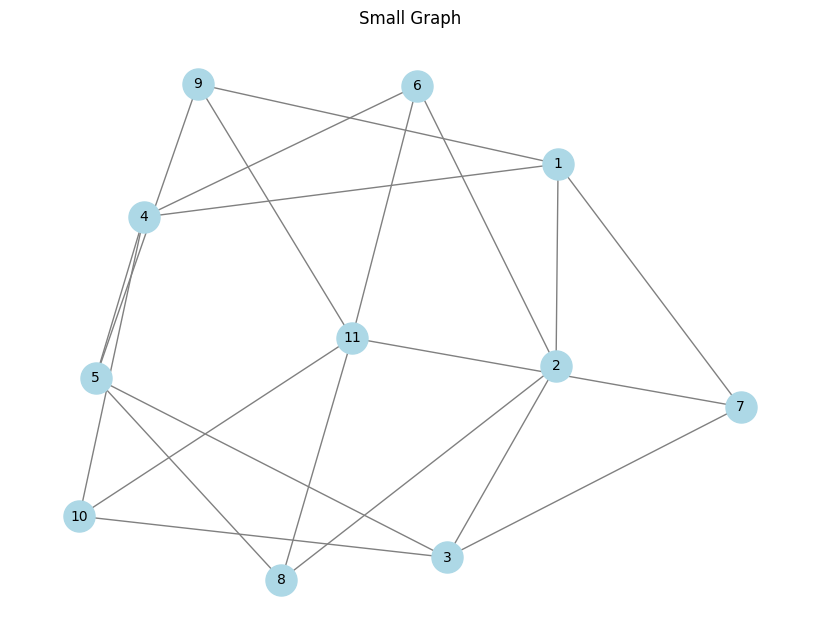

In [2]:
dataset = "../../data/myciel3.col.txt"
graph = loading_graphs(dataset, size="Small")
num_nodes = graph.number_of_nodes()

plot_graph(graph, title="Small Graph")

## Experiments

In [3]:
POP_SIZE = 100
MAX_GEN = 500
MAX_COLORS = 10
ELITISM = 2
STATIONAY_LIMIT = 100
MUTATION_RATE = 0.1

# Experiments (Name, Selection, Crossover, Mutation)
experiments = [
    {
        "Experiment": "Experiment 1",
        "Selection": tournament_selection,
        "Crossover": one_point_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 2",
        "Selection": tournament_selection,
        "Crossover": one_point_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    },
    {
        "Experiment": "Experiment 3",
        "Selection": tournament_selection,
        "Crossover": uniform_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 4",
        "Selection": tournament_selection,
        "Crossover": uniform_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    },
    {
        "Experiment": "Experiment 5",
        "Selection": roulette_wheel_selection,
        "Crossover": one_point_crossover,
        "Mutation": single_gene_mutation,
        "Mutation Rate": None
    },
    {
        "Experiment": "Experiment 6",
        "Selection": roulette_wheel_selection,
        "Crossover": uniform_crossover,
        "Mutation": independent_gene_mutation,
        "Mutation Rate": MUTATION_RATE
    }
]

In [4]:
results_table = []
best_overall = None
best_history = None

print(f"Running Experiments for {dataset}\n")

for exp in experiments:
    print(f"Running {exp["Experiment"]}...")

    best_ind, history = run_genetic_algorithm(
        graph=graph,
        pop_size=POP_SIZE,
        max_generations=MAX_GEN,
        max_colors=MAX_COLORS,
        selection_func=exp["Selection"],
        crossover_func=exp["Crossover"],
        mutation_func=exp["Mutation"],
        mutation_rate=exp["Mutation Rate"],
        elitism_count=ELITISM,
        stationary_limit=STATIONAY_LIMIT
    )

    # Store Results
    results_table.append({
        "Experiment": exp["Experiment"],
        "Selection": exp["Selection"].__name__,
        "Crossover": exp["Crossover"].__name__,
        "Mutation": exp["Mutation"].__name__,
        "Best Fitness": best_ind.fitness,
        "Conflicts": best_ind.conflicts,
        "Colors Used": len(set(best_ind.genes))
    })

    # Store Best Overall Individual
    if best_overall is None or best_ind.fitness < best_overall.fitness:
        best_overall = best_ind
        best_history = history

Running Experiments for ../../data/myciel3.col.txt

Running Experiment 1...
Stationary state reached at generation 107.
Running Experiment 2...
Stationary state reached at generation 106.
Running Experiment 3...
Stationary state reached at generation 112.
Running Experiment 4...
Stationary state reached at generation 112.
Running Experiment 5...
Stationary state reached at generation 129.
Running Experiment 6...
Stationary state reached at generation 128.



Results Table
  Experiment                Selection           Crossover                  Mutation  Best Fitness  Conflicts  Colors Used
Experiment 1     tournament_selection one_point_crossover      single_gene_mutation             4          0            4
Experiment 2     tournament_selection one_point_crossover independent_gene_mutation             4          0            4
Experiment 3     tournament_selection   uniform_crossover      single_gene_mutation             4          0            4
Experiment 4     tournament_selection   uniform_crossover independent_gene_mutation             4          0            4
Experiment 5 roulette_wheel_selection one_point_crossover      single_gene_mutation             4          0            4
Experiment 6 roulette_wheel_selection   uniform_crossover independent_gene_mutation             4          0            4


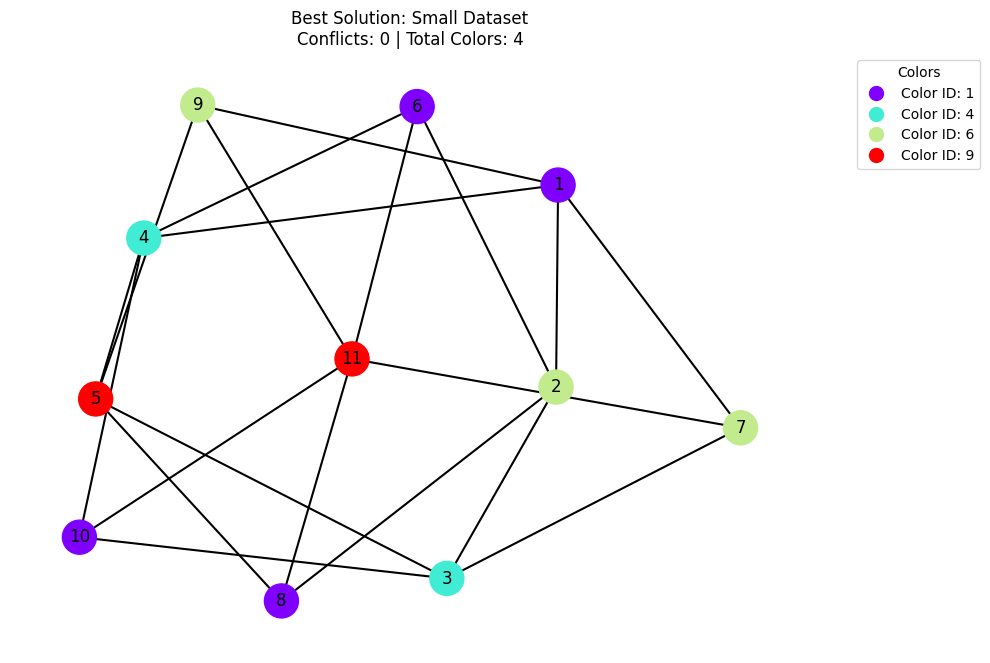

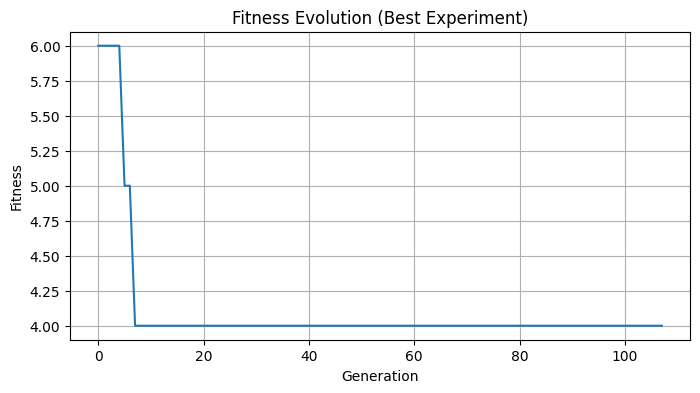

In [5]:
df = pd.DataFrame(results_table)
print("\nResults Table")
print(df.to_string(index=False))

if best_overall is not None:
    plot_colored_graph(graph, best_overall, title=f"Best Solution: Small Dataset")

    plt.figure(figsize=(8, 4))
    plt.plot(best_history)
    plt.title("Fitness Evolution (Best Experiment)")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()